## 베이즈이론
- 확률을 해석하는 이론
- 베이지안 확률은 주관적으로 확률을 해석

* 나이브베이즈분류 모델 : 데이터의 모든 특정 변수가 서로 동등하고 독립적이라는 가정하에 분류를 실행

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- 'Daily Time Spent on Site': consumer time on site in minutes
- 'Age': cutomer age in years
- 'Area Income': Avg. Income of geographical area of consumer
- 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
- 'Ad Topic Line': Headline of the advertisement
- 'City': City of consumer
- 'Male': Whether or not consumer was male
- 'Country': Country of consumer
- 'Timestamp': Time at which consumer clicked on Ad or closed window
- 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## 광고 데이터 분석

In this project we will be working with advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

https://www.kaggle.com/code/dipankarroydipu/advertising-data-analysis-logistic-regression

참고하기!

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/advertising.csv')
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       916 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [10]:
data.isna().sum()

Daily Time Spent on Site     0
Age                         84
Area Income                  0
Daily Internet Usage         0
Ad Topic Line                0
City                         0
Male                         0
Country                      0
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [11]:
data[data['Age'].isna() == True]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
6,88.91,NaN,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,1/28/2016 20:59,0
18,54.70,NaN,31087.54,118.39,Grass-roots solution-oriented conglomeration,Jessicastad,1,British Indian Ocean Territory (Chagos Archipe...,2/13/2016 7:53,1
30,67.64,NaN,51473.28,267.01,Programmable asymmetric data-warehouse,Phelpschester,1,Peru,7/2/2016 20:23,0
55,80.60,NaN,67479.62,177.55,Sharable bottom-line solution,Thomasview,0,Croatia,4/7/2016 3:56,0
...,...,...,...,...,...,...,...,...,...,...
931,61.76,NaN,33553.90,114.69,Open-source local approach,Edwardsport,0,Jamaica,5/27/2016 8:53,1
932,63.30,NaN,63071.34,116.19,Polarized intangible encoding,Lake Evantown,0,Saint Barthelemy,5/9/2016 7:13,1
958,79.83,NaN,55764.43,234.23,Innovative regional groupware,North Frankstad,1,Sudan,5/18/2016 19:33,0
959,85.35,NaN,64235.51,161.42,Exclusive multi-state Internet solution,Claytonside,1,Ecuador,2/17/2016 11:15,0


In [12]:
data['Age'].mode()

0    31.0
Name: Age, dtype: float64

In [13]:
data['Age'] = data['Age'].fillna(31.0)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [17]:
data['City']

0         Wrightburgh
1           West Jodi
2            Davidton
3      West Terrifurt
4        South Manuel
            ...      
995         Duffystad
996       New Darlene
997     South Jessica
998       West Steven
999       Ronniemouth
Name: City, Length: 1000, dtype: object

In [16]:
data['Ad Topic Line']

0         Cloned 5thgeneration orchestration
1         Monitored national standardization
2           Organic bottom-line service-desk
3      Triple-buffered reciprocal time-frame
4              Robust logistical utilization
                       ...                  
995            Fundamental modular algorithm
996          Grass-roots cohesive monitoring
997             Expanded intangible solution
998     Proactive bandwidth-monitored policy
999          Virtual 5thgeneration emulation
Name: Ad Topic Line, Length: 1000, dtype: object

In [18]:
data['Country']

0                     Tunisia
1                       Nauru
2                  San Marino
3                       Italy
4                     Iceland
                ...          
995                   Lebanon
996    Bosnia and Herzegovina
997                  Mongolia
998                 Guatemala
999                    Brazil
Name: Country, Length: 1000, dtype: object

In [21]:
data['Country'].value_counts()

Country
Czech Republic      9
France              9
Senegal             8
Peru                8
Greece              8
                   ..
Kiribati            1
Marshall Islands    1
Bermuda             1
Mozambique          1
Lesotho             1
Name: count, Length: 237, dtype: int64

In [39]:
data['Timestamp'].head(10)

0     3/27/2016 0:53
1      4/4/2016 1:39
2    3/13/2016 20:35
3     1/10/2016 2:31
4      6/3/2016 3:36
5    5/19/2016 14:30
6    1/28/2016 20:59
7      3/7/2016 1:40
8     4/18/2016 9:33
9     7/11/2016 1:42
Name: Timestamp, dtype: object

<Axes: xlabel='Area Income', ylabel='Count'>

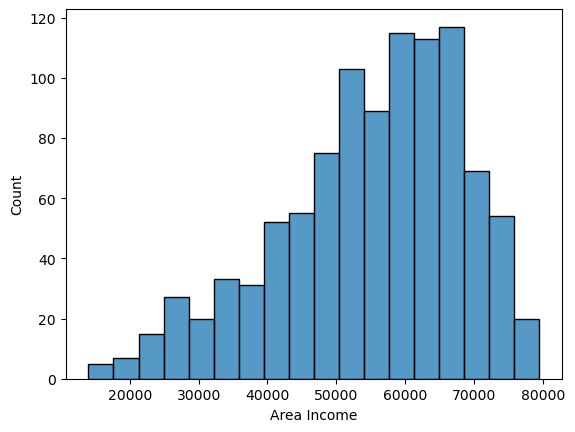

In [20]:
sns.histplot(data['Area Income'])

<Axes: xlabel='Daily Internet Usage', ylabel='Count'>

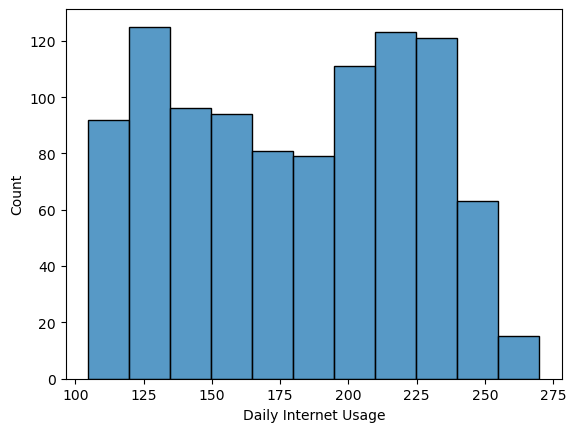

In [22]:
sns.histplot(data['Daily Internet Usage'])

In [26]:
data['Area Income'].describe()

count     1000.000000
mean     55000.000080
std      13414.634022
min      13996.500000
25%      47031.802500
50%      57012.300000
75%      65470.635000
max      79484.800000
Name: Area Income, dtype: float64

In [27]:
outlier = data['Area Income'].describe()

In [30]:
outlier['25%'] - (1.5 * (outlier['75%'] - outlier['25%']))

np.float64(19373.553750000003)

In [32]:
data[data['Area Income'] < 19373.553750000003]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
135,49.89,39.0,17709.98,160.03,Enhanced system-worthy application,East Michele,1,Belize,4/16/2016 12:09,1
410,48.09,33.0,19345.36,180.42,Balanced motivating help-desk,West Travismouth,0,Heard Island and McDonald Islands,5/28/2016 12:38,1
510,57.86,30.0,18819.34,166.86,Horizontal modular success,Estesfurt,0,Algeria,7/8/2016 17:14,1
640,64.63,45.0,15598.29,158.80,Triple-buffered high-level Internet solution,Isaacborough,1,Azerbaijan,6/12/2016 3:11,1
665,58.05,31.0,15879.10,195.54,Total asynchronous architecture,Sanderstown,1,Tajikistan,2/12/2016 10:39,1
692,66.26,47.0,14548.06,179.04,Optional full-range projection,Matthewtown,1,Lebanon,4/25/2016 19:31,1
768,68.58,41.0,13996.50,171.54,Exclusive discrete firmware,New Williamville,1,El Salvador,7/6/2016 12:04,1
778,52.67,44.0,14775.50,191.26,Persevering 5thgeneration knowledge user,New Hollyberg,0,Jersey,5/19/2016 6:37,1
952,62.79,36.0,18368.57,231.87,Total coherent archive,New James,1,Luxembourg,5/30/2016 20:08,1


<Axes: xlabel='Age', ylabel='Count'>

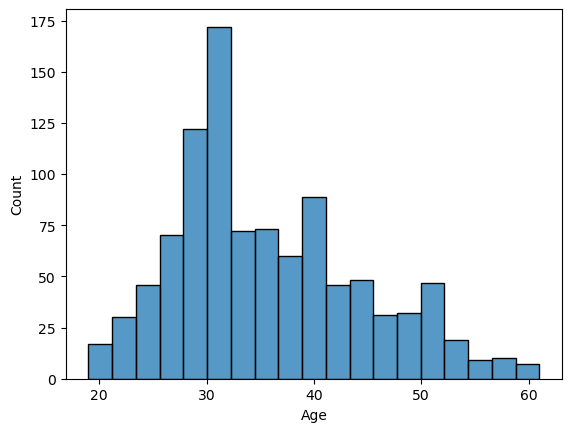

In [33]:
sns.histplot(data['Age'])

In [35]:
data['City'].nunique()

969

In [36]:
data['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

In [37]:
data['Daily Time Spent on Site'].describe()

count    1000.000000
mean       65.000200
std        15.853615
min        32.600000
25%        51.360000
50%        68.215000
75%        78.547500
max        91.430000
Name: Daily Time Spent on Site, dtype: float64

<Axes: xlabel='Daily Time Spent on Site', ylabel='Count'>

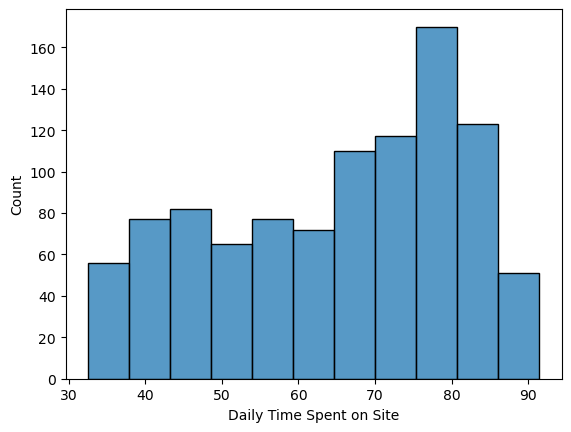

In [38]:
sns.histplot(data['Daily Time Spent on Site'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = data['Clicked on Ad']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
# 가우시안 나이브베이즈를 이용해서 분류분석

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))